In [55]:
import numpy as np
import pandas as pd
import geopandas as gpd
import shapely
from shapely.wkt import loads
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
import matplotlib.pyplot as plt
import seaborn as sns
import altair as alt
from mpl_toolkits.mplot3d import Axes3D
alt.data_transformers.enable("vegafusion")

DataTransformerRegistry.enable('vegafusion')

# Choose night time temperatures in July

In [2]:
temp =  pd.read_csv('/Users/lisawink/Documents/paper1/data/gap_filled_data_ta_rh.csv')
temp['datetime_UTC']=pd.to_datetime(temp['datetime_UTC'])
temp = temp[temp['variable']=='Ta_deg_C']

In [3]:
# choose all times between 8pm and 6am in July
temp = temp[(temp['datetime_UTC'].dt.hour>=20) | (temp['datetime_UTC'].dt.hour<6)]
temp = temp[(temp['datetime_UTC'].dt.month==7)]
temp_result = temp.groupby('station_id').mean(numeric_only=True)

In [4]:
print(temp_result)

                value
station_id           
FRASHA      18.117387
FRBETZ      19.234097
FRBRUH      19.517806
FRDIET      17.673581
FRDREI      19.145097
FREBNE      16.233065
FREICH      17.081452
FRFRIE      19.094677
FRGART      19.044548
FRGLBA      16.929258
FRGUNT      17.314677
FRHAID      19.161032
FRHBHF      19.754968
FRHERD      19.719194
FRHOCH      17.628613
FRHOLZ      18.648548
FRIHOC      18.035774
FRINST      20.284323
FRKART      20.367581
FRLAND      18.547194
FRLORE      17.758290
FRMERZ      17.082355
FRMESS      19.590258
FROPFS      17.225032
FROWIE      19.106452
FRPDAS      19.236097
FRRIES      19.613484
FRSEEP      19.138484
FRSTGA      19.242000
FRSTGE      19.264000
FRSTUH      19.546677
FRTIEN      17.180645
FRUNIK      20.026581
FRUWIE      18.866871
FRVAUB      18.501032
FRWAHS      16.482935
FRWEIN      19.390097
FRWILD      17.627387
FRWITT      19.297871
FRWSEE      18.336032
FRZAHR      18.852000


# Import Urban Form Parameters

In [35]:
# import and drop index
params = gpd.read_parquet('/Users/lisawink/Documents/paper1/data/processed_data/processed_station_params_150.parquet')

In [37]:
params.index = params['station_id']

In [38]:
params

,station_id,station_no,station_name,station_long_name,station_type,station_lat,station_lon,station_elevation,mounting_structure,sky_view_factor,...,StrDeg_mode,StrSCl_count,StrSCl_mean,StrSCl_median,StrSCl_std,StrSCl_min,StrSCl_max,StrSCl_sum,StrSCl_nunique,StrSCl_mode
station_id,,,,,,,,,,,,,,,,,,,,,
FRASHA,FRASHA,1,Freiburg Alte Stadthalle,Station Freiburg Alte Stadthalle (FRASHA),Tier_I,47.986557,7.870209,296.0,Lamp post,0.721,...,1.0,7.0,0.023976,0.000000,0.041145,0.000000,0.090909,0.167832,3.0,0.000000
FRBETZ,FRBETZ,2,Freiburg Betzenhausen,Station Freiburg Betzenhausen (FRBETZ),Tier_II,48.004900,7.817673,250.5,Lamp post,0.645,...,1.0,3.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
FRBRUH,FRBRUH,3,Freiburg Bruehl,Station Freiburg Bruehl (FRBRUH),Tier_I,48.031009,7.854189,237.6,Lamp post,0.730,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRDIET,FRDIET,4,Freiburg Dietenbach,Station Freiburg Dietenbach (FRDIET),Tier_II,48.013766,7.792878,230.0,Free-standing post,0.868,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRDREI,FRDREI,5,Freiburg Dreisam,Station Freiburg Dreisam (FRDREI),Tier_I,47.995872,7.826545,260.1,Lamp post,0.778,...,3.0,4.0,0.090909,0.090909,0.000000,0.090909,0.090909,0.363636,1.0,0.090909
FRFRIE,FRFRIE,8,Freiburg Hauptfriedhof,Station Freiburg Hauptfriedhof (FRFRIE),Tier_II,48.010887,7.841538,257.0,Lamp post,0.762,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRGART,FRGART,9,Freiburg Gartenstadt,Station Freiburg Gartenstadt (FRGART),Tier_II,47.986798,7.824259,262.3,Lamp post,0.799,...,4.0,9.0,0.068487,0.076923,0.041030,0.000000,0.111111,0.616386,6.0,0.000000
FRGLBA,FRGLBA,10,Freiburg Glasbach,Station Freiburg Glasbach (FRGLBA),Tier_II,48.006918,7.868736,289.5,Lamp post,0.475,...,4.0,1.0,0.058824,0.058824,NaN,0.058824,0.058824,0.058824,1.0,0.058824
FRGUNT,FRGUNT,11,Freiburg Guenterstal,Station Freiburg Guenterstal (FRGUNT),Tier_I,47.964012,7.858853,339.2,Lamp post,0.620,...,3.0,2.0,0.088889,0.088889,0.031427,0.066667,0.111111,0.177778,2.0,0.066667


In [39]:
params = params[params['station_id']!='FRTECH']

In [40]:
params = params.merge(temp_result, left_on='station_id', right_on='station_id',how='inner')

ValueError: 'station_id' is both an index level and a column label, which is ambiguous.

In [41]:
items = [
    'BuAre_count', 'BuAre_sum', 'BuAre_mean', 'BuAre_std', 
    'BuHt_sum', 'BuHt_mean', 'BuHt_std', 
    'BuPer_sum', 'BuPer_mean', 'BuPer_std', 
    'BuLAL_sum', 'BuLAL_mean', 'BuLAL_std', 
    'BuCCD_mean_sum', 'BuCCD_mean_mean', 'BuCCD_mean_std', 
    'BuCor_sum', 'BuCor_mean', 'BuCor_std', 
    'CyAre_sum', 'CyAre_mean', 'CyAre_std', 
    'CyInd_mean', 'CyInd_std', 
    'BuCWA_mean', 'BuCWA_std', 
    'BuCon_mean', 'BuCon_std', 
    'BuElo_mean', 'BuElo_std', 
    'BuERI_mean', 'BuERI_std', 
    'BuFR_mean', 'BuFR_std', 
    'BuFF_mean', 'BuFF_std', 
    'BuFD_mean', 'BuFD_std', 
    'BuRec_mean', 'BuRec_std', 
    'BuShI_mean', 'BuShI_std', 
    'BuSqC_mean', 'BuSqC_std', 
    'BuSqu_mean', 'BuSqu_std', 
    'BuAdj', 
    'BuIBD', 
    'BuSWR_mean', 'BuSWR_std', 
    'BuOri_mean', 'BuOri_std', 
    'BuAli_mean', 'BuAli_std', 
    'StrAli_mean', 'StrAli_std', 
    'StrW_mean', 'StrW_std', 
    'StrWD_mean', 'StrWD_std', 
    'StrOpe_mean', 'StrOpe_std', 
    'StrHW_mean', 'StrHW_std', 
    'StrLen_mean', 'StrLen_std', 
    'StrCNS_mean', 'StrCNS_std', 
    'BpM_mean', 'BpM_std', 
    'StrLin_mean', 'StrLin_std', 
    'StrClo400_mean', 'StrClo400_std', 
    'StrBet400_mean', 'StrBet400_std', 
    'StrSCl_mean', 'StrSCl_std', 
    'StrCyc400_mean', 'StrCyc400_std', 
    'StrENR400_mean', 'StrENR400_std', 
    'StrGam400_mean', 'StrGam400_std', 
    'StrDeg_mean', 'StrDeg_std', 
    'StrMes400_mean', 'StrMes400_std',
    'StrClo1200_mean', 'StrClo1200_std', 
    'StrBet1200_mean', 'StrBet1200_std',  
    'StrCyc1200_mean', 'StrCyc1200_std', 
    'StrENR1200_mean', 'StrENR1200_std', 
    'StrGam1200_mean', 'StrGam1200_std', 
    'StrMes1200_mean', 'StrMes1200_std'
]


In [42]:
red_params = params[items]

In [43]:
# remove columns with more than 7 NaN values
red_params = red_params.dropna(thresh=red_params.shape[0] - 7, axis=1)
red_params

,BuAre_count,BuAre_sum,BuAre_mean,BuAre_std,BuHt_sum,BuHt_mean,BuHt_std,BuPer_sum,BuPer_mean,BuPer_std,...,StrBet1200_mean,StrBet1200_std,StrCyc1200_mean,StrCyc1200_std,StrENR1200_mean,StrENR1200_std,StrGam1200_mean,StrGam1200_std,StrMes1200_mean,StrMes1200_std
station_id,,,,,,,,,,,,,,,,,,,,,
FRASHA,66,8973.225121,135.957956,190.823113,551.743,8.359742,4.727052,2908.840970,44.073348,30.711117,...,12.142857,18.542101,8.142857,9.099974,1.065172,0.298277,0.479705,0.020348,0.103879,0.097726
FRBETZ,104,13512.271795,129.925690,217.423198,824.997,7.932663,6.394472,4491.326139,43.185828,37.574845,...,65.000000,112.583302,6.000000,3.605551,1.074015,0.034444,0.370836,0.013736,0.047748,0.019200
FRBRUH,25,33809.476181,1352.379047,1689.230559,195.856,7.834240,4.969540,3441.540674,137.661627,106.940229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRDIET,3,873.282723,291.094241,477.765895,30.617,10.205667,9.464500,185.781494,61.927165,79.971430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRDREI,38,11930.603585,313.963252,285.562320,550.460,14.485789,4.286963,2868.041275,75.474770,40.260866,...,2069.250000,1614.270811,18.250000,2.986079,1.157512,0.016755,0.393081,0.005255,0.085324,0.008171
FRFRIE,5,1080.906786,216.181357,57.748370,20.018,4.003600,0.630552,314.878892,62.975778,9.631965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRGART,166,10242.344024,61.700868,36.241460,1427.728,8.600771,0.930045,6334.980931,38.162536,6.898535,...,510.666667,266.746134,29.666667,1.322876,1.229991,0.008246,0.416697,0.003056,0.121458,0.004458
FRGLBA,72,7805.922499,108.415590,75.223722,659.701,9.162514,4.086203,3001.500358,41.687505,17.885760,...,150.000000,NaN,27.000000,NaN,1.333333,NaN,0.456140,NaN,0.178808,NaN
FRGUNT,93,8477.172853,91.152396,75.907103,627.221,6.744312,3.453318,3515.272346,37.798627,18.583118,...,96.500000,9.192388,7.000000,0.000000,1.181818,0.000000,0.419355,0.000000,0.114754,0.000000


# Correlate Parameters

In [44]:
corr = red_params.corr()

In [45]:
long_df = corr.reset_index().melt(id_vars='index', var_name='Variable', value_name='Correlation')

# Create the heatmap using Altair
heatmap = alt.Chart(long_df).mark_rect().encode(
    x=alt.X('index:N', title='Variables', sort=None),  # Column names
    y=alt.Y('Variable:N', title='Variables', sort=None),  # Row names
    color=alt.Color('Correlation:Q', scale=alt.Scale(scheme='viridis'), title='Correlation'),
    tooltip=['index', 'Variable', 'Correlation']  # Tooltips for interactivity
).properties(
    width=1000,
    height=1000,
    title='Correlation Heatmap'
).interactive()

# Display the heatmap
heatmap.show()

alt.Chart(...)

# PCA

In [46]:
# Select the relevant variables and standardize them

scaler = StandardScaler()
X_scaled = scaler.fit_transform(red_params.dropna())

In [47]:
# Perform PCA
pca = PCA()
pca.fit(X_scaled)

PCA()

In [48]:
# Get the loadings
loadings = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(len(pca.components_))], index=red_params.columns)
print(loadings)

                      PC1       PC2       PC3       PC4       PC5       PC6  \
BuAre_count     -0.079021 -0.217176 -0.005073  0.072975  0.005944 -0.027566   
BuAre_sum        0.137693 -0.084634  0.067440  0.006509 -0.143275  0.078143   
BuAre_mean       0.143750  0.148077  0.008859  0.030365 -0.070934  0.088327   
BuAre_std        0.149965  0.115871  0.060079  0.054826 -0.074482  0.067680   
BuHt_sum         0.019389 -0.238892 -0.027973  0.004099 -0.033270  0.046091   
...                   ...       ...       ...       ...       ...       ...   
StrENR1200_std  -0.022175  0.005322  0.222706 -0.094599  0.070477  0.191055   
StrGam1200_mean  0.084234 -0.066434 -0.042402 -0.212495 -0.057343  0.126820   
StrGam1200_std  -0.084010  0.071618  0.143472  0.044189  0.073535  0.053758   
StrMes1200_mean  0.108578 -0.088978 -0.093289 -0.171172 -0.085905  0.036487   
StrMes1200_std  -0.046502  0.029163  0.214807 -0.069131  0.082068  0.182050   

                      PC7       PC8       PC9      

In [49]:
# Get the explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

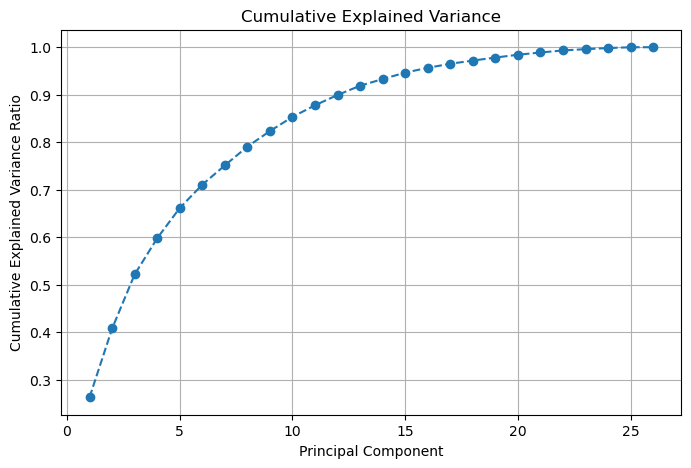

In [50]:
# Create a cumulative variance plot
cumulative_variance = explained_variance_ratio.cumsum()

plt.figure(figsize=(8, 5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance')
plt.xlabel('Principal Component')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

In [51]:
red_params

,BuAre_count,BuAre_sum,BuAre_mean,BuAre_std,BuHt_sum,BuHt_mean,BuHt_std,BuPer_sum,BuPer_mean,BuPer_std,...,StrBet1200_mean,StrBet1200_std,StrCyc1200_mean,StrCyc1200_std,StrENR1200_mean,StrENR1200_std,StrGam1200_mean,StrGam1200_std,StrMes1200_mean,StrMes1200_std
station_id,,,,,,,,,,,,,,,,,,,,,
FRASHA,66,8973.225121,135.957956,190.823113,551.743,8.359742,4.727052,2908.840970,44.073348,30.711117,...,12.142857,18.542101,8.142857,9.099974,1.065172,0.298277,0.479705,0.020348,0.103879,0.097726
FRBETZ,104,13512.271795,129.925690,217.423198,824.997,7.932663,6.394472,4491.326139,43.185828,37.574845,...,65.000000,112.583302,6.000000,3.605551,1.074015,0.034444,0.370836,0.013736,0.047748,0.019200
FRBRUH,25,33809.476181,1352.379047,1689.230559,195.856,7.834240,4.969540,3441.540674,137.661627,106.940229,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRDIET,3,873.282723,291.094241,477.765895,30.617,10.205667,9.464500,185.781494,61.927165,79.971430,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRDREI,38,11930.603585,313.963252,285.562320,550.460,14.485789,4.286963,2868.041275,75.474770,40.260866,...,2069.250000,1614.270811,18.250000,2.986079,1.157512,0.016755,0.393081,0.005255,0.085324,0.008171
FRFRIE,5,1080.906786,216.181357,57.748370,20.018,4.003600,0.630552,314.878892,62.975778,9.631965,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
FRGART,166,10242.344024,61.700868,36.241460,1427.728,8.600771,0.930045,6334.980931,38.162536,6.898535,...,510.666667,266.746134,29.666667,1.322876,1.229991,0.008246,0.416697,0.003056,0.121458,0.004458
FRGLBA,72,7805.922499,108.415590,75.223722,659.701,9.162514,4.086203,3001.500358,41.687505,17.885760,...,150.000000,NaN,27.000000,NaN,1.333333,NaN,0.456140,NaN,0.178808,NaN
FRGUNT,93,8477.172853,91.152396,75.907103,627.221,6.744312,3.453318,3515.272346,37.798627,18.583118,...,96.500000,9.192388,7.000000,0.000000,1.181818,0.000000,0.419355,0.000000,0.114754,0.000000


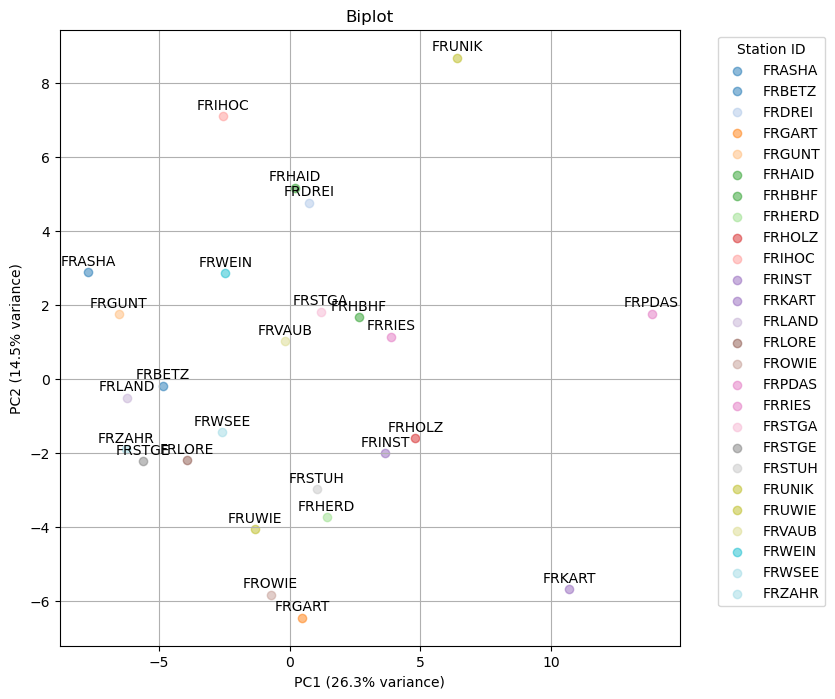

In [53]:
# Assuming params_mean has a 'station_id' column
station_ids = red_params.dropna().index
unique_station_ids = station_ids.unique()
colors = plt.cm.tab20(np.linspace(0, 1, len(unique_station_ids)))
color_map = dict(zip(unique_station_ids, colors))

# Plotting the loadings (biplot)
loadings = pca.components_.T

plt.figure(figsize=(8, 8))

# Uncomment if you want to plot the arrows and text for loadings
# for i, var in enumerate(params_mean.columns):
#     plt.arrow(0, 0, loadings[i, 0], loadings[i, 1], color='r', alpha=0.5)
#     plt.text(loadings[i, 0] * 1.15, loadings[i, 1] * 1.15, var, color='g', ha='center', va='center')

# Scatter plot with colors and labels for station_id
for station_id in unique_station_ids:
    idx = station_ids == station_id
    transformed_data = pca.transform(X_scaled)[idx]
    plt.scatter(transformed_data[:, 0], transformed_data[:, 1], 
                alpha=0.5, color=color_map[station_id], label=station_id)
    for i in range(len(transformed_data)):
        plt.annotate(station_id, (transformed_data[i, 0], transformed_data[i, 1]), 
                     textcoords="offset points", xytext=(0, 5), ha='center')

plt.xlabel(f"PC1 ({explained_variance_ratio[0]:.1%} variance)")
plt.ylabel(f"PC2 ({explained_variance_ratio[1]:.1%} variance)")
plt.title('Biplot')
plt.grid(True)
plt.legend(title='Station ID',bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

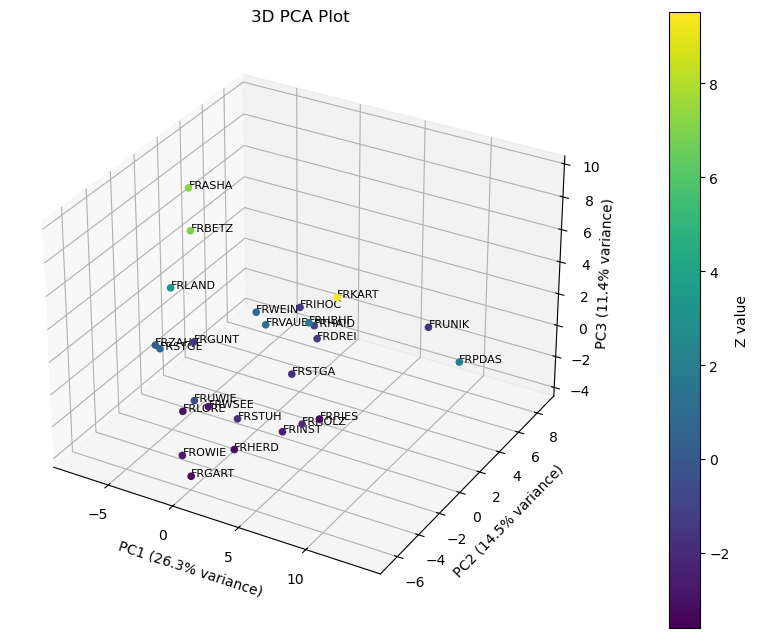

In [54]:
# Assuming params_mean has a 'station_id' column
station_ids = red_params.dropna().index
unique_station_ids = station_ids.unique()

# Transform the data using PCA
transformed_data = pca.transform(X_scaled)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors corresponding to z-values
sc = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], 
                alpha=1, c=transformed_data[:, 2], cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Z value')

# Add text labels for station_id
for station_id in unique_station_ids:
    idx = station_ids == station_id
    for i in range(len(transformed_data[idx])):
        ax.text(transformed_data[idx][i, 0], transformed_data[idx][i, 1], transformed_data[idx][i, 2], 
                station_id, size=8, zorder=1, color='k')

ax.set_xlabel(f"PC1 ({explained_variance_ratio[0]:.1%} variance)")
ax.set_ylabel(f"PC2 ({explained_variance_ratio[1]:.1%} variance)")
ax.set_zlabel(f"PC3 ({explained_variance_ratio[2]:.1%} variance)")
ax.zaxis.labelpad=-0.5

ax.set_title('3D PCA Plot')
plt.show()

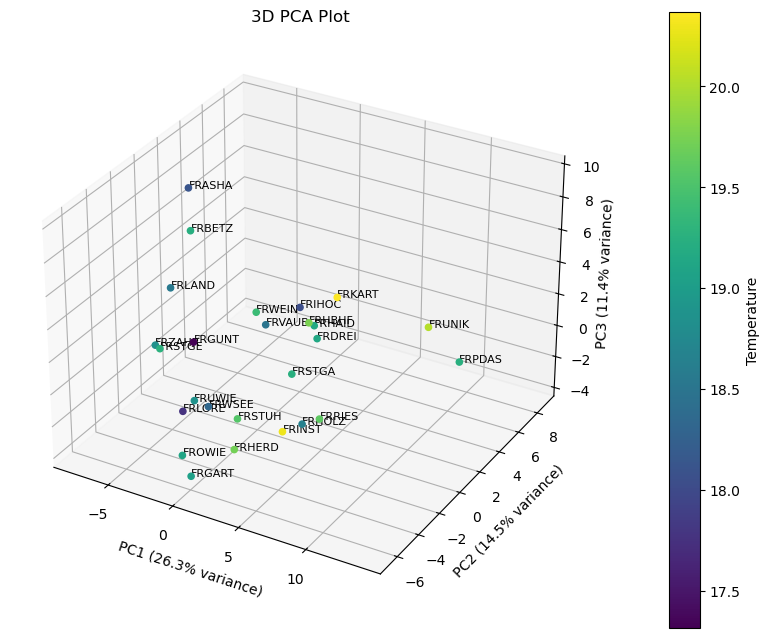

In [56]:
# Assuming params_mean has a 'station_id' column
station_ids = red_params.dropna().index
unique_station_ids = station_ids.unique()

# Transform the data using PCA
transformed_data = pca.transform(X_scaled)

# Assuming temp_result is a numpy array or pandas Series with the same length as transformed_data
temp_result = red_params.dropna().merge(temp_result, left_on='station_id', right_on='station_id')['value']

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# Scatter plot with colors corresponding to temp_result
sc = ax.scatter(transformed_data[:, 0], transformed_data[:, 1], transformed_data[:, 2], 
                alpha=1, c=temp_result, cmap='viridis')

# Add color bar
cbar = plt.colorbar(sc, ax=ax, pad=0.1)
cbar.set_label('Temperature')

# Add text labels for station_id
for station_id in unique_station_ids:
    idx = station_ids == station_id
    for i in range(len(transformed_data[idx])):
        ax.text(transformed_data[idx][i, 0], transformed_data[idx][i, 1], transformed_data[idx][i, 2], 
                station_id, size=8, zorder=1, color='k')

ax.set_xlabel(f"PC1 ({explained_variance_ratio[0]:.1%} variance)")
ax.set_ylabel(f"PC2 ({explained_variance_ratio[1]:.1%} variance)")
ax.set_zlabel(f"PC3 ({explained_variance_ratio[2]:.1%} variance)")
ax.zaxis.labelpad=-0.5

ax.set_title('3D PCA Plot')
plt.show()

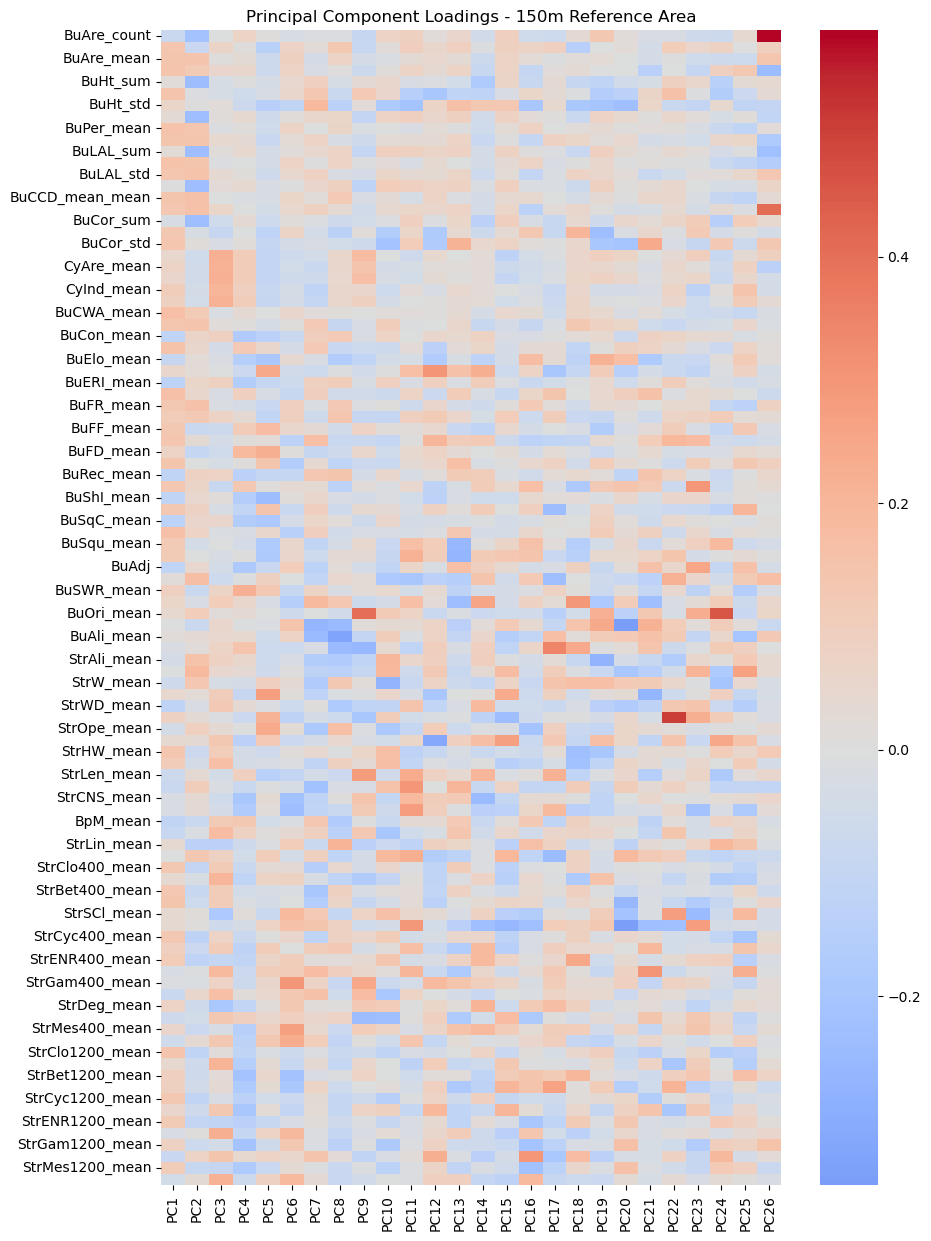

In [63]:
# Convert loadings to DataFrame for better visualization
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])], index=red_params.columns)

plt.figure(figsize=(10, 15))
sns.heatmap(loadings_df, annot=False, cmap='coolwarm', center=0)
plt.title('Principal Component Loadings - 150m Reference Area')
plt.savefig('/Users/lisawink/Documents/paper1/figures/PCA_150m_loadings.svg',bbox_inches='tight')
plt.show()

In [64]:
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,...,PC17,PC18,PC19,PC20,PC21,PC22,PC23,PC24,PC25,PC26
BuAre_count,-0.079021,-0.217176,-0.005073,0.072975,0.005944,-0.027566,-0.010870,-0.010042,-0.090955,0.075123,...,-0.065353,0.036639,0.131983,0.014061,-0.019106,-0.020803,-0.057535,-0.068122,0.038444,0.583806
BuAre_sum,0.137693,-0.084634,0.067440,0.006509,-0.143275,0.078143,0.022744,0.127477,-0.089081,0.019114,...,0.090046,-0.145500,-0.003541,0.021075,-0.039345,0.105181,0.059722,0.081821,-0.004149,0.089649
BuAre_mean,0.143750,0.148077,0.008859,0.030365,-0.070934,0.088327,-0.041960,0.071587,-0.043160,-0.013962,...,-0.006408,0.018540,0.025173,-0.002970,-0.035261,0.004148,-0.055452,-0.057268,-0.065067,0.138286
BuAre_std,0.149965,0.115871,0.060079,0.054826,-0.074482,0.067680,-0.022555,0.007770,-0.071212,0.011514,...,0.016167,0.030909,-0.004047,0.000779,-0.137573,-0.004806,-0.096680,0.091700,0.130298,-0.243500
BuHt_sum,0.019389,-0.238892,-0.027973,0.004099,-0.033270,0.046091,0.092213,-0.028439,0.032168,0.053356,...,0.031895,-0.092343,-0.117861,-0.052948,-0.030631,0.088690,0.052343,-0.143599,0.027643,0.041713
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
StrENR1200_std,-0.022175,0.005322,0.222706,-0.094599,0.070477,0.191055,-0.010848,-0.099320,-0.023592,0.026511,...,-0.048054,-0.132016,-0.046841,0.056196,-0.021423,0.015662,0.037102,-0.025295,0.031398,0.057104
StrGam1200_mean,0.084234,-0.066434,-0.042402,-0.212495,-0.057343,0.126820,-0.013332,-0.131081,-0.008730,-0.178390,...,-0.127340,-0.023125,-0.026227,0.161695,-0.029385,-0.053954,-0.163552,0.097968,0.081600,0.152032
StrGam1200_std,-0.084010,0.071618,0.143472,0.044189,0.073535,0.053758,0.145256,0.021011,-0.108789,-0.018896,...,-0.187609,0.179675,-0.136774,-0.026367,-0.029632,0.082918,-0.090632,0.191728,-0.041322,0.022875
StrMes1200_mean,0.108578,-0.088978,-0.093289,-0.171172,-0.085905,0.036487,-0.008607,-0.076131,-0.006869,-0.128605,...,-0.128446,0.056144,-0.015844,0.158721,-0.014705,-0.051386,-0.091979,0.121230,0.090494,-0.081995


In [66]:
loadings_df = loadings_df.reset_index()  # Move the index into a column
loadings_df.rename(columns={"index": "Feature"}, inplace=True)

In [69]:
# Melt the DataFrame for Altair compatibility
data_melted = loadings_df.melt(id_vars=["Feature"], var_name="Principal Component", value_name="Value")

# Create the heatmap
heatmap = alt.Chart(data_melted).mark_rect().encode(
    x=alt.X("Principal Component:O", title="Principal Components"),
    y=alt.Y("Feature:O", title="Features"),
    color=alt.Color("Value:Q", scale=alt.Scale(scheme="viridis"), title="Correlation"),
    tooltip=["Feature", "Principal Component", "Value"]
).properties(
    width=800,
    height=1500,
    title="Interactive Heatmap of Features vs Principal Components"
).interactive()

heatmap.display()


alt.Chart(...)

In [71]:
# Assume `loadings` is a 2D numpy array with variables as rows and PCs as columns
loadings_df = pd.DataFrame(loadings, columns=[f'PC{i+1}' for i in range(loadings.shape[1])])

# the index should be the variable names
loadings_df.index = red_params.columns

# Focus on the first x PCs
loadings_subset = loadings_df.iloc[:, :15]

In [72]:
correlation_matrix = loadings_subset.T.corr()
# Define a threshold for high correlation (e.g., 0.8)
threshold = 0.8

# Find variable pairs with high absolute correlation
high_corr_pairs = [(var1, var2) for var1 in correlation_matrix.columns for var2 in correlation_matrix.columns 
                   if abs(correlation_matrix.loc[var1, var2]) > threshold and var1 != var2]

In [73]:
high_corr_pairs

[('BuAre_count', 'BuPer_sum'),
 ('BuAre_count', 'BuLAL_sum'),
 ('BuAre_count', 'BuCCD_mean_sum'),
 ('BuAre_count', 'BuCor_sum'),
 ('BuAre_mean', 'BuAre_std'),
 ('BuAre_mean', 'BuPer_mean'),
 ('BuAre_mean', 'BuLAL_mean'),
 ('BuAre_mean', 'BuCCD_mean_mean'),
 ('BuAre_mean', 'BuCWA_mean'),
 ('BuAre_mean', 'BuFR_mean'),
 ('BuAre_mean', 'BuFR_std'),
 ('BuAre_std', 'BuAre_mean'),
 ('BuAre_std', 'BuPer_std'),
 ('BuAre_std', 'BuLAL_std'),
 ('BuAre_std', 'BuCCD_mean_std'),
 ('BuPer_sum', 'BuAre_count'),
 ('BuPer_sum', 'BuLAL_sum'),
 ('BuPer_sum', 'BuCCD_mean_sum'),
 ('BuPer_sum', 'BuCor_sum'),
 ('BuPer_mean', 'BuAre_mean'),
 ('BuPer_mean', 'BuLAL_mean'),
 ('BuPer_mean', 'BuCCD_mean_mean'),
 ('BuPer_mean', 'BuCWA_mean'),
 ('BuPer_mean', 'BuFR_mean'),
 ('BuPer_std', 'BuAre_std'),
 ('BuPer_std', 'BuLAL_std'),
 ('BuPer_std', 'BuCCD_mean_std'),
 ('BuPer_std', 'BuCWA_std'),
 ('BuLAL_sum', 'BuAre_count'),
 ('BuLAL_sum', 'BuPer_sum'),
 ('BuLAL_sum', 'BuCCD_mean_sum'),
 ('BuLAL_sum', 'BuCor_sum'),
 ('Bu

/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_16238/832106605.py:1: ClusterWarning: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  Z = linkage(1 - abs(correlation_matrix), method='ward')


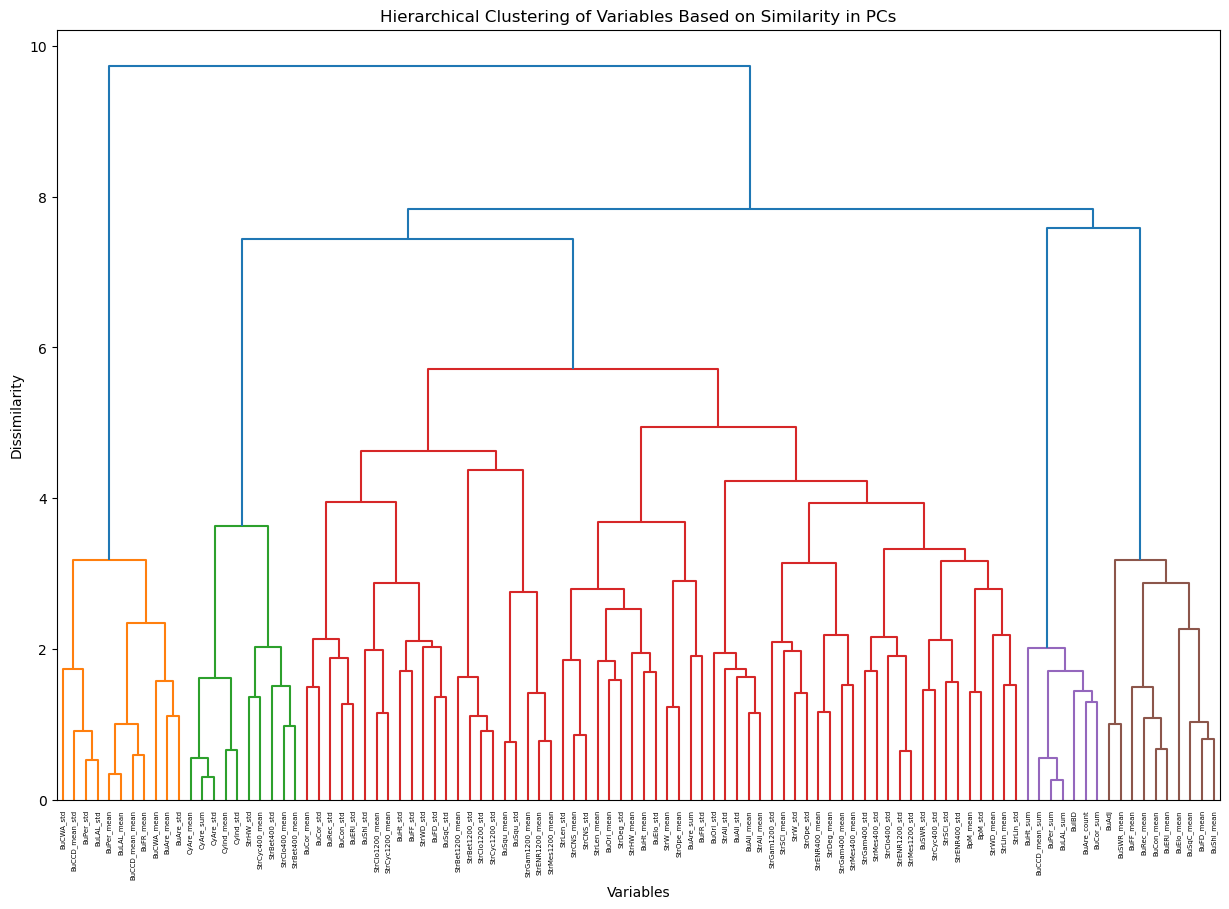

In [74]:
Z = linkage(1 - abs(correlation_matrix), method='ward')
plt.figure(figsize=(15, 10))
dendrogram(Z, labels=correlation_matrix.columns, leaf_rotation=90)
plt.title("Hierarchical Clustering of Variables Based on Similarity in PCs")
plt.xlabel("Variables")
plt.ylabel("Dissimilarity")
plt.show()

In [75]:
loadings_df['PC1'].sort_values(ascending=False)

BuCWA_mean    0.169358
BuSqC_std     0.160745
BuERI_std     0.159886
BuPer_mean    0.154836
BuLAL_mean    0.154349
                ...   
BuRec_mean   -0.115759
BuAdj        -0.117738
StrWD_mean   -0.120412
BuERI_mean   -0.127641
BuSqC_mean   -0.128350
Name: PC1, Length: 100, dtype: float64

In [76]:
loadings_df['PC2'].sort_values(ascending=False)

StrAli_std         0.184492
BuIBD              0.173188
BuFR_mean          0.157803
BuCCD_mean_std     0.157331
BuCCD_mean_mean    0.155527
                     ...   
BuCCD_mean_sum    -0.232760
BuCor_sum         -0.233617
BuPer_sum         -0.234992
BuLAL_sum         -0.235710
BuHt_sum          -0.238892
Name: PC2, Length: 100, dtype: float64

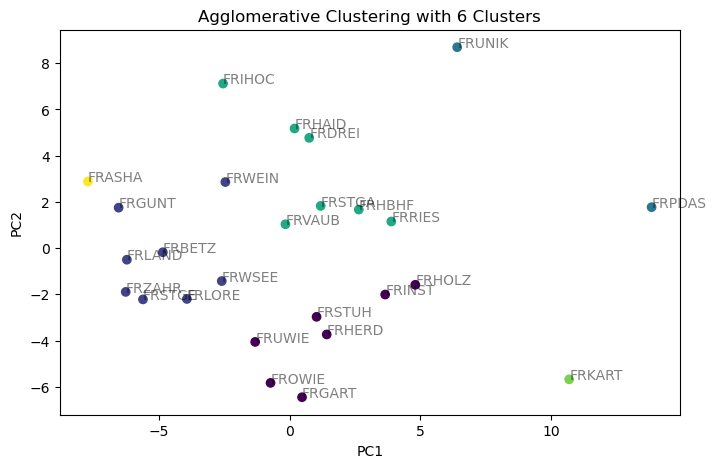

In [77]:
# find clusters in PCs

# Perform Agglomerative Clustering
n_clusters = 6
clustering = AgglomerativeClustering(n_clusters=n_clusters)
clustering.fit(transformed_data)

# Get the cluster labels
cluster_labels = clustering.labels_

# Plot the clusters
plt.figure(figsize=(8, 5))
plt.scatter(transformed_data[:, 0], transformed_data[:, 1], c=cluster_labels, cmap='viridis')
for i, station_id in enumerate(station_ids):
    plt.annotate(station_id, (transformed_data[i, 0], transformed_data[i, 1]),alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title(f'Agglomerative Clustering with {n_clusters} Clusters')
plt.show()


R^2: 1.0
Intercept: 19.042847394540942
Coefficients:
PC1: 0.08943468174477096
PC2: -0.024958965361848037
PC3: 0.024682853639993185
PC4: 0.016754661667313514
PC5: 0.0030826565667190155
PC6: -0.025605686531530076
PC7: 0.12854259052999403
PC8: 0.005358469006200384
PC9: 0.006065436190734897
PC10: 0.10562857488370679
PC11: -0.17836257763285723
PC12: 0.020966893750267456
PC13: 0.05444414014301023
PC14: 0.08240807865862505
PC15: 0.0809759107863546
PC16: 0.002918644241008082
PC17: 0.019468896825908372
PC18: -0.012533733027862376
PC19: 0.14545174775091935
PC20: 0.002920951157140748
PC21: -0.057072167735381256
PC22: -0.41651560642796004
PC23: 0.12082011420520869
PC24: -0.1315549466244945
PC25: 0.08564177489725157
PC26: 2.7937439122468825e-16


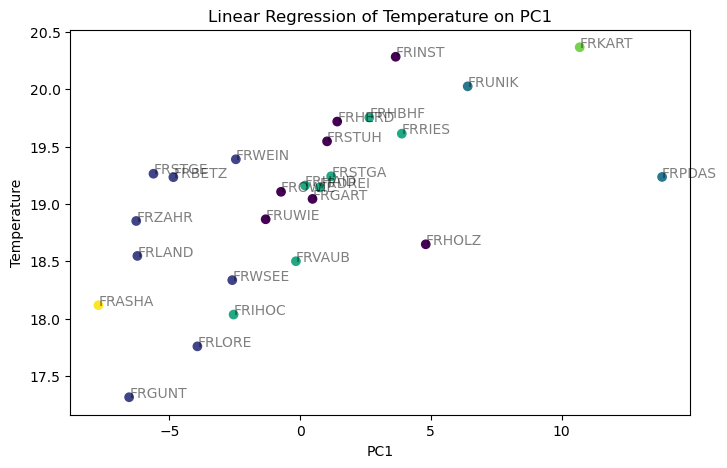

In [107]:
# do linear regression on the PCs and temp and print r squared for each PC


from sklearn.linear_model import LinearRegression


# Fit a linear regression model
model = LinearRegression()
model.fit(transformed_data, temp_result)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Get the R^2 value
r_squared = model.score(transformed_data, temp_result)

print(f'R^2: {r_squared}')


# Print the coefficients
print(f'Intercept: {intercept}')
print('Coefficients:')
for i, coef in enumerate(coefficients):
    print(f'PC{i+1}: {coef}')

    
    
# Plot the regression line
plt.figure(figsize=(8, 5))
plt.scatter(transformed_data[:, 0], temp_result, c=cluster_labels, cmap='viridis', linestyle='None')
plt.plot(transformed_data[:, 0], model.predict(transformed_data), color='red', linestyle='None')
for i, station_id in enumerate(station_ids):
    plt.annotate(station_id, (transformed_data[i, 0], temp_result.iloc[i]), alpha=0.5)
plt.xlabel('PC1')
plt.ylabel('Temperature')
plt.title('Linear Regression of Temperature on PC1')
plt.show()

In [79]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error, mean_absolute_error 

In [80]:
# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(transformed_data, temp_result, test_size=0.3, random_state=101) 
  
# creating a regression model 
model = LinearRegression() 
  
# fitting the model 
model.fit(X_train, y_train) 
  
# making predictions 
predictions = model.predict(X_test) 
  
# model evaluation 
print('mean_squared_error : ', mean_squared_error(y_test, predictions)) 
print('mean_absolute_error : ', mean_absolute_error(y_test, predictions)) 

mean_squared_error :  0.7760177019104203
mean_absolute_error :  0.6972015642521274


Intercept: 19.042847394540942
Coefficient: 0.08943468174477097
R^2: 0.3937235920880856


<Figure size 800x500 with 0 Axes>

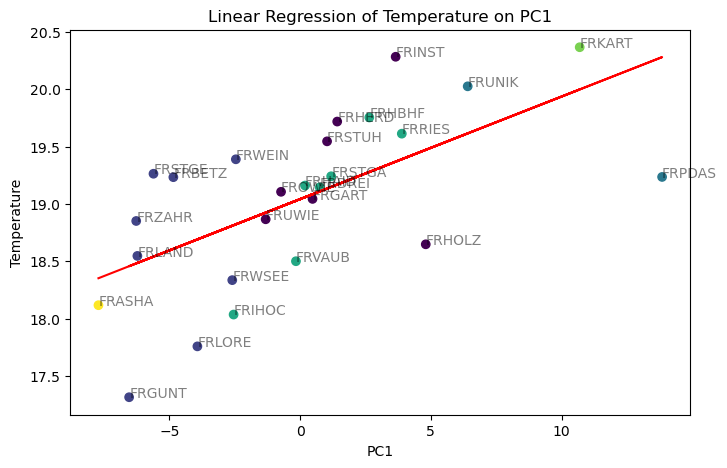

Intercept: 19.042847394540942
Coefficient: -0.024958965361848086
R^2: 0.016881423944975493


<Figure size 800x500 with 0 Axes>

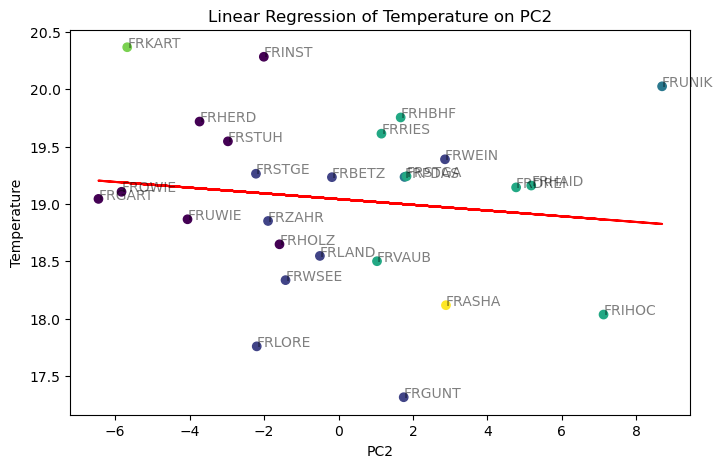

Intercept: 19.042847394540942
Coefficient: 0.024682853639993074
R^2: 0.012995172221978879


<Figure size 800x500 with 0 Axes>

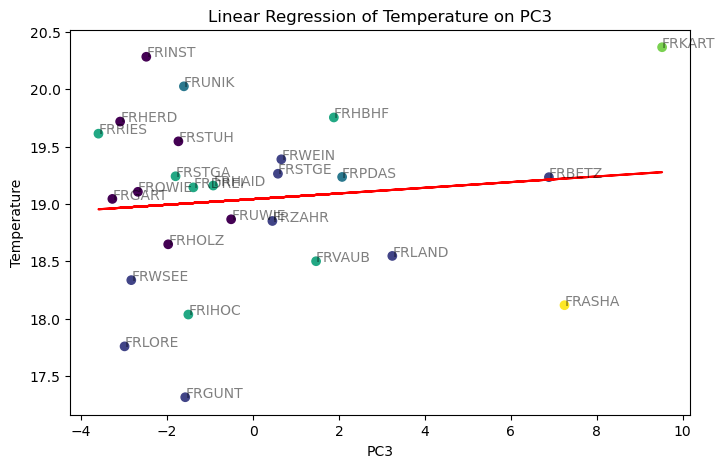

Intercept: 19.042847394540942
Coefficient: 0.01675466166731354
R^2: 0.004002833040120168


<Figure size 800x500 with 0 Axes>

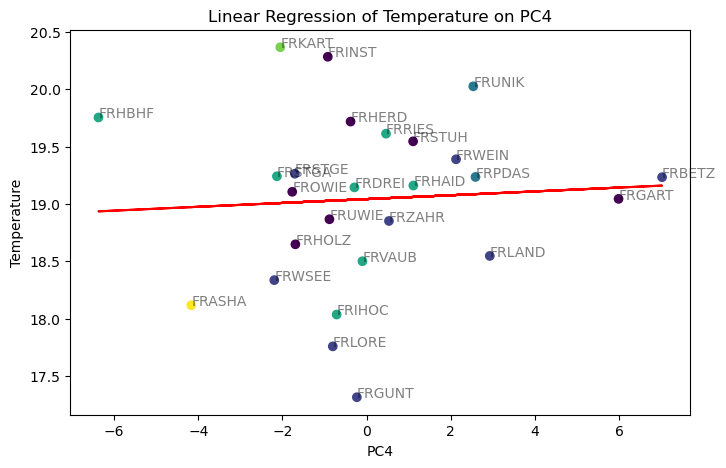

Intercept: 19.042847394540942
Coefficient: 0.003082656566719064
R^2: 0.00011319266012554952


<Figure size 800x500 with 0 Axes>

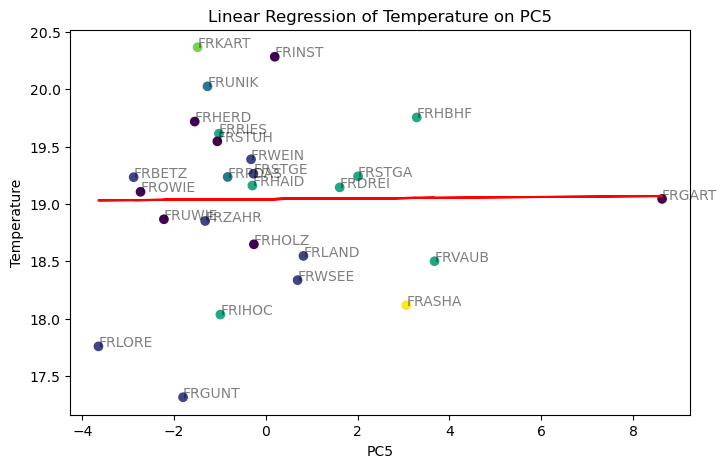

Intercept: 19.042847394540942
Coefficient: -0.025605686531530423
R^2: 0.0060351615079399235


<Figure size 800x500 with 0 Axes>

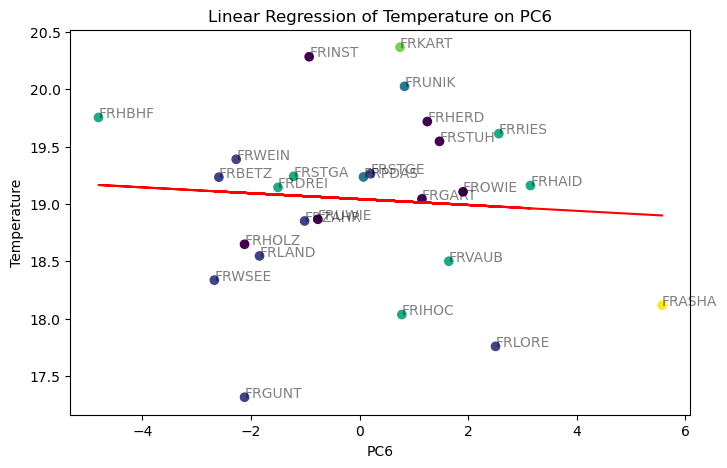

Intercept: 19.042847394540942
Coefficient: 0.12854259052999384
R^2: 0.12539933568203143


<Figure size 800x500 with 0 Axes>

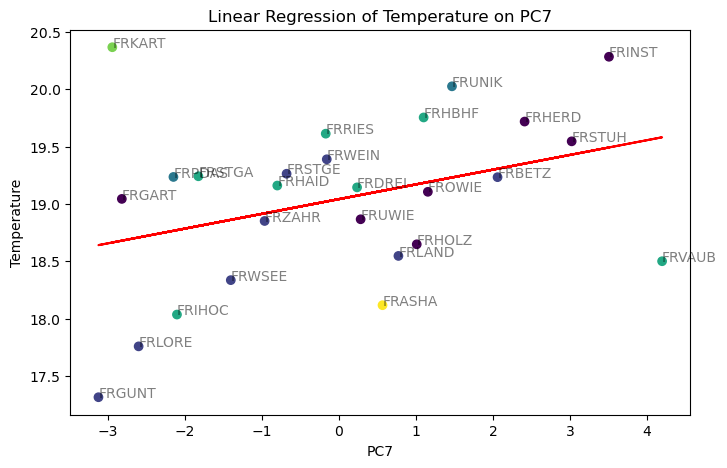

Intercept: 19.042847394540942
Coefficient: 0.005358469006200574
R^2: 0.00021269937551327


<Figure size 800x500 with 0 Axes>

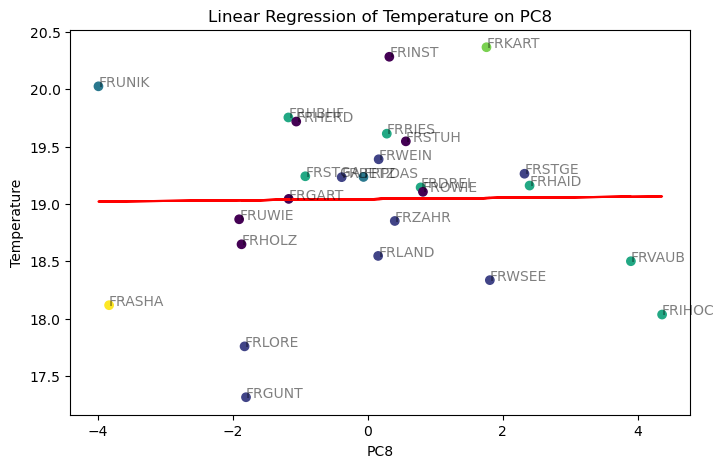

Intercept: 19.042847394540942
Coefficient: 0.006065436190734803
R^2: 0.00022523863245160758


<Figure size 800x500 with 0 Axes>

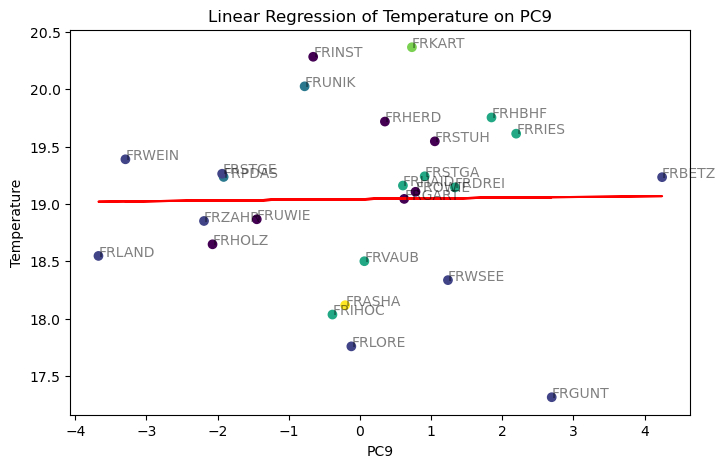

Intercept: 19.042847394540942
Coefficient: 0.10562857488370678
R^2: 0.06239981521131188


<Figure size 800x500 with 0 Axes>

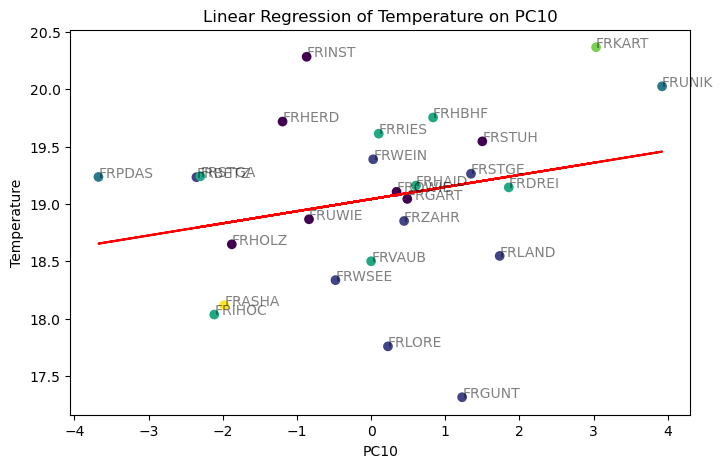

Intercept: 19.042847394540942
Coefficient: -0.17836257763285704
R^2: 0.14573936656243813


<Figure size 800x500 with 0 Axes>

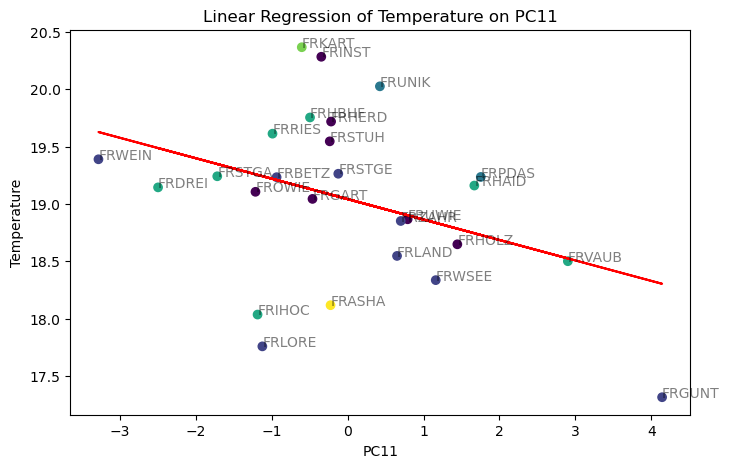

Intercept: 19.042847394540942
Coefficient: 0.020966893750267602
R^2: 0.0017865612565454159


<Figure size 800x500 with 0 Axes>

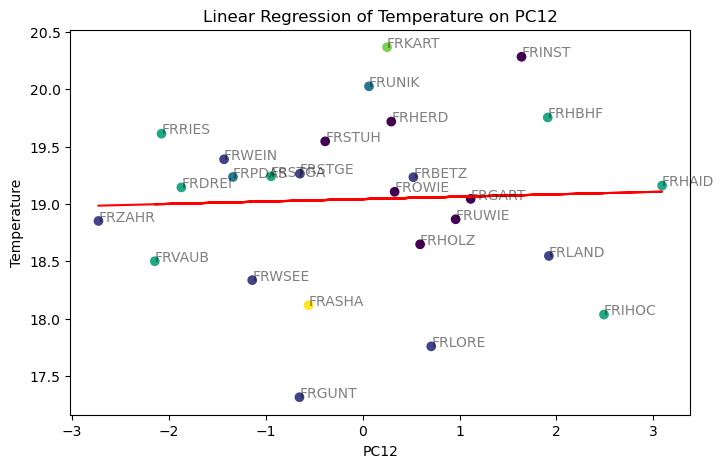

Intercept: 19.042847394540942
Coefficient: 0.05444414014301058
R^2: 0.010797758288342618


<Figure size 800x500 with 0 Axes>

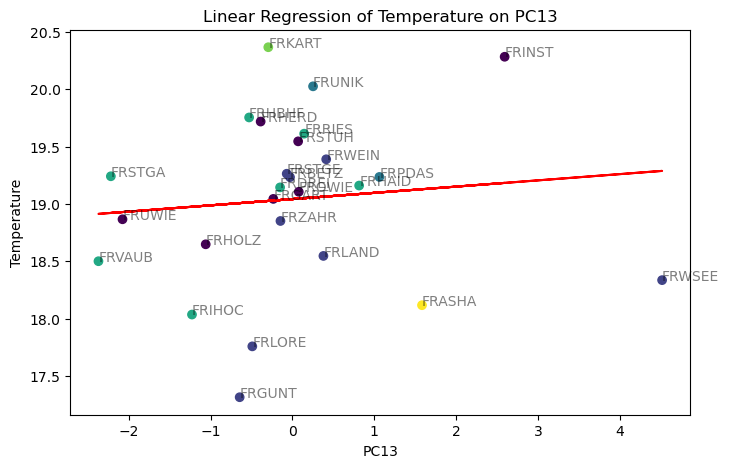

Intercept: 19.042847394540942
Coefficient: 0.08240807865862503
R^2: 0.01781667476023807


<Figure size 800x500 with 0 Axes>

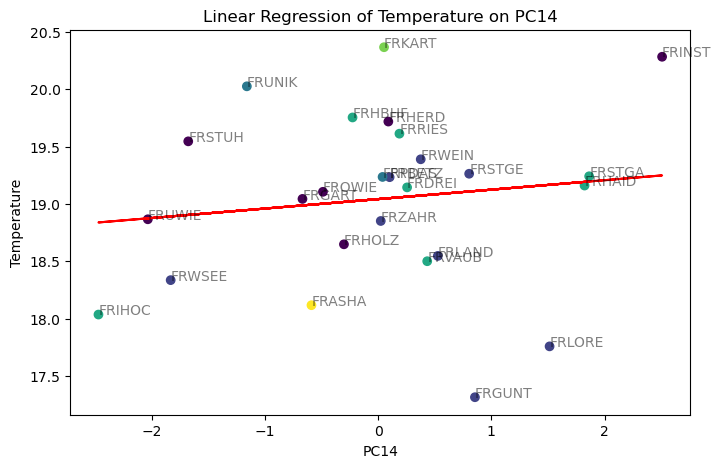

Intercept: 19.042847394540942
Coefficient: 0.0809759107863547
R^2: 0.01670837355316923


<Figure size 800x500 with 0 Axes>

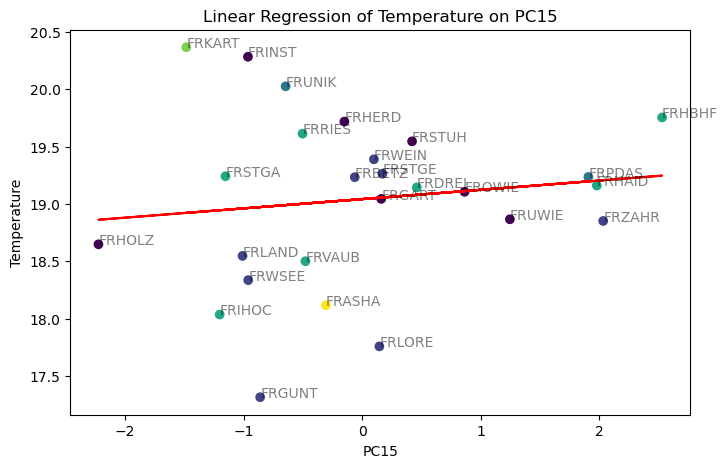

Intercept: 19.042847394540942
Coefficient: 0.002918644241007948
R^2: 1.6056916442463987e-05


<Figure size 800x500 with 0 Axes>

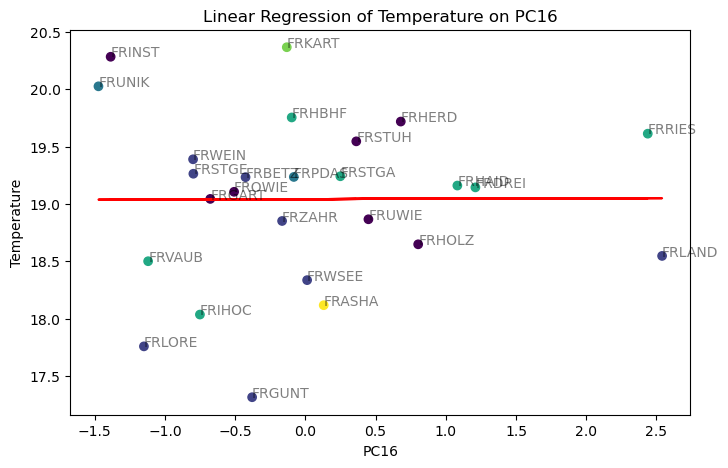

Intercept: 19.042847394540942
Coefficient: 0.019468896825908844
R^2: 0.0006085966441364832


<Figure size 800x500 with 0 Axes>

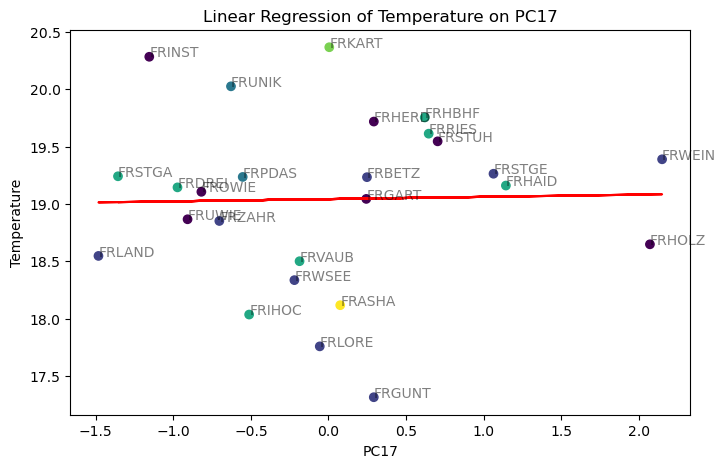

Intercept: 19.042847394540942
Coefficient: -0.012533733027862693
R^2: 0.00019585386101972357


<Figure size 800x500 with 0 Axes>

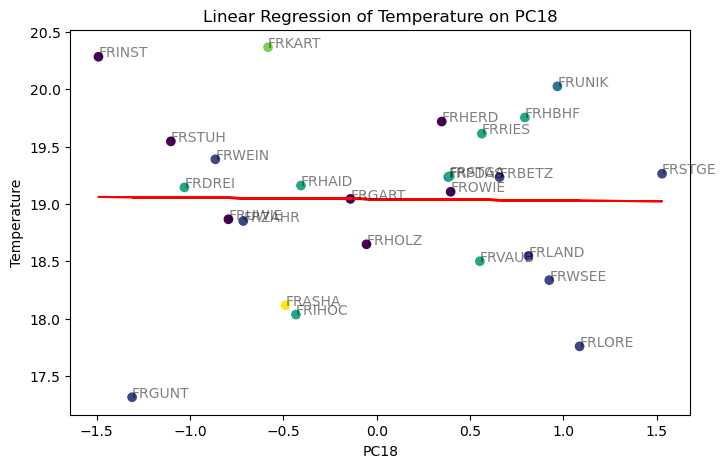

Intercept: 19.042847394540942
Coefficient: 0.1454517477509192
R^2: 0.025449553531749824


<Figure size 800x500 with 0 Axes>

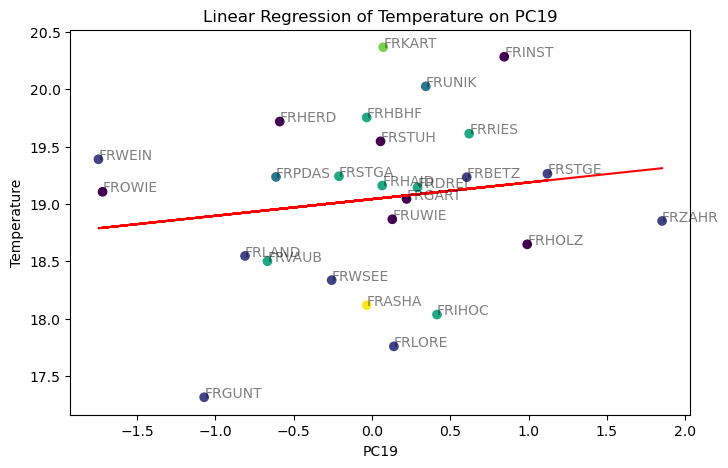

Intercept: 19.042847394540942
Coefficient: 0.0029209511571403777
R^2: 9.318269224012354e-06


<Figure size 800x500 with 0 Axes>

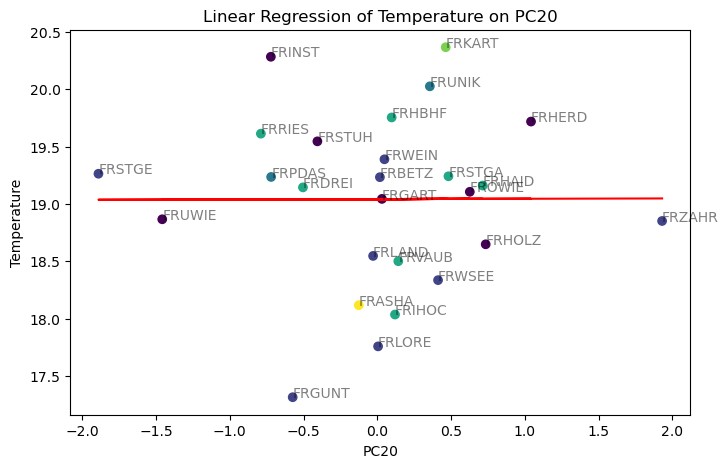

Intercept: 19.042847394540942
Coefficient: -0.057072167735381166
R^2: 0.0029252127200711797


<Figure size 800x500 with 0 Axes>

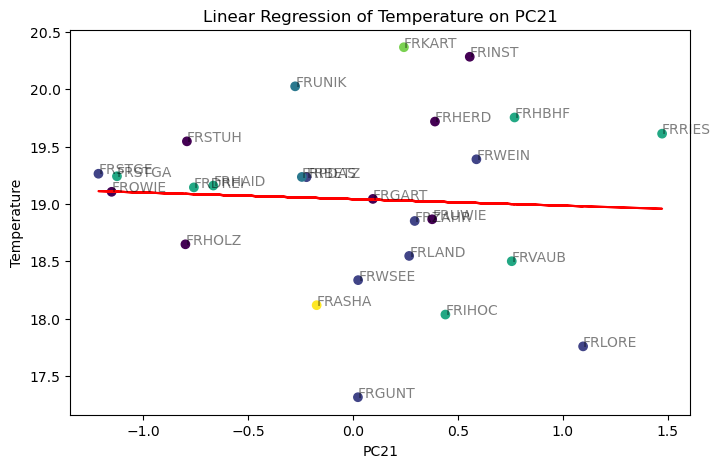

Intercept: 19.042847394540942
Coefficient: -0.4165156064279593
R^2: 0.13860672206373736


<Figure size 800x500 with 0 Axes>

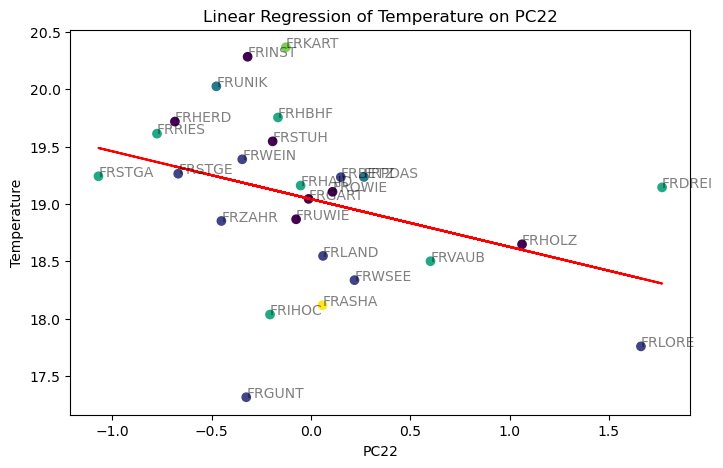

Intercept: 19.042847394540942
Coefficient: 0.12082011420520851
R^2: 0.0074695355582332645


<Figure size 800x500 with 0 Axes>

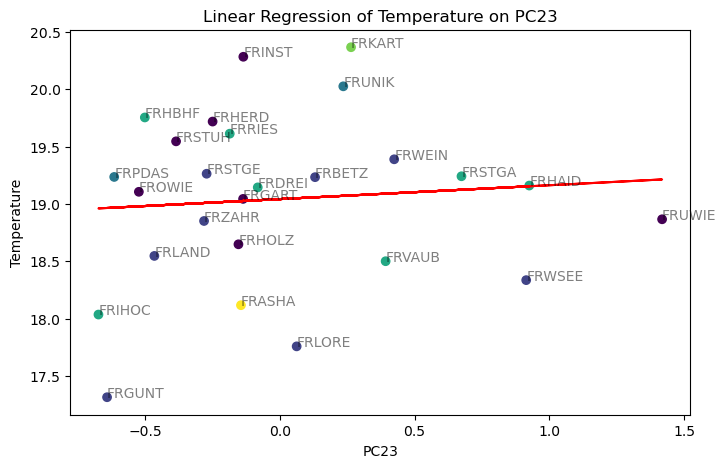

Intercept: 19.042847394540942
Coefficient: -0.13155494662449554
R^2: 0.0074324214770276065


<Figure size 800x500 with 0 Axes>

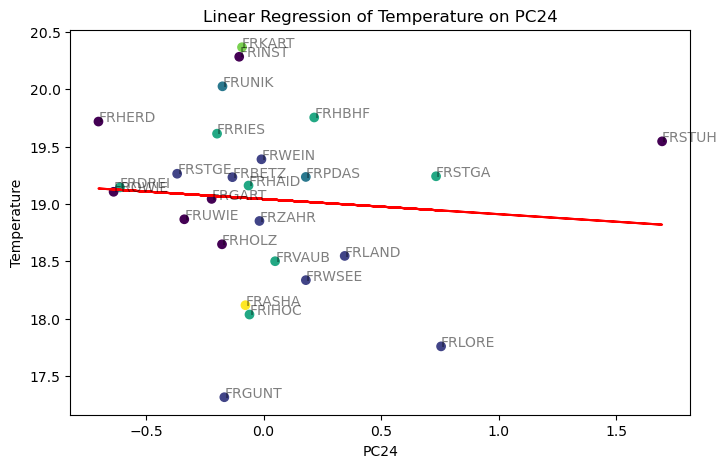

Intercept: 19.042847394540942
Coefficient: 0.085641774897251
R^2: 0.002449530173091463


<Figure size 800x500 with 0 Axes>

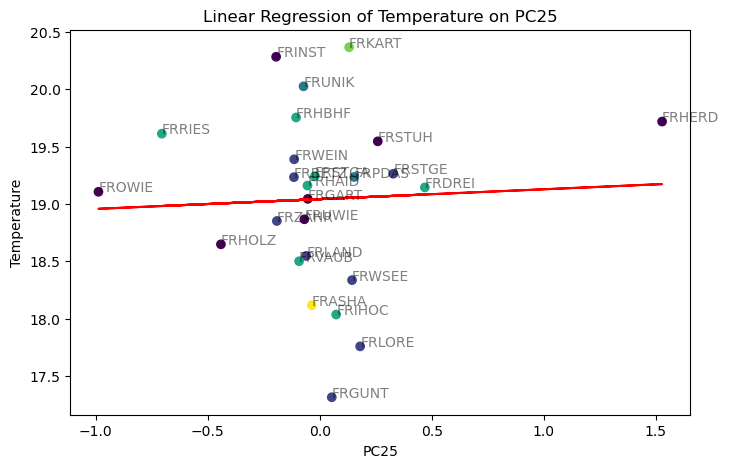

Intercept: 19.038006986088845
Coefficient: 59815804167631.05
R^2: 0.006449649260275581


<Figure size 800x500 with 0 Axes>

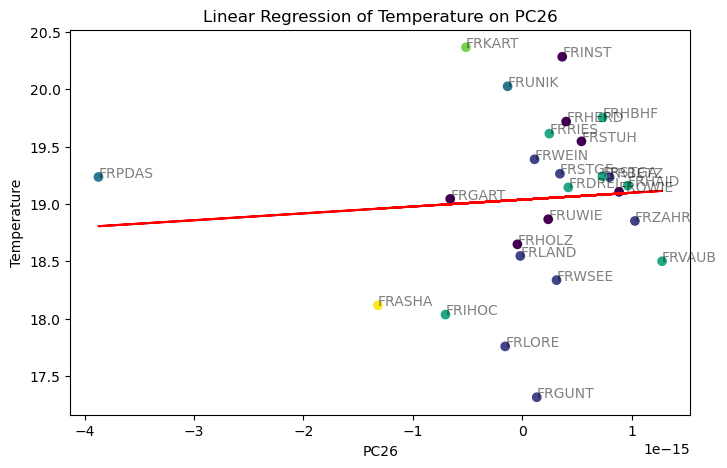

In [98]:
# regression between temperature and PC1

for i in range(0, 26):
    plt.figure(figsize=(8, 5))
    # Fit a linear regression model
    model = LinearRegression()
    model.fit(transformed_data[:, i].reshape(-1, 1), temp_result)

    # Get the coefficients
    coefficients = model.coef_
    intercept = model.intercept_

    # Get the R^2 value
    r_squared = model.score(transformed_data[:, i].reshape(-1, 1), temp_result)

    # Print the coefficients
    print(f'Intercept: {intercept}')
    print(f'Coefficient: {coefficients[0]}')
    print(f'R^2: {r_squared}')

    # Plot the regression line

    plt.figure(figsize=(8, 5))
    plt.scatter(transformed_data[:, i], temp_result, c=cluster_labels, cmap='viridis')
    plt.plot(transformed_data[:, i], model.predict(transformed_data[:, i].reshape(-1, 1)), color='red')
    for j, station_id in enumerate(station_ids):
        plt.annotate(station_id, (transformed_data[j, i], temp_result.iloc[j]), alpha=0.5)
    plt.xlabel('PC'+str(i+1))
    plt.ylabel('Temperature')
    plt.title('Linear Regression of Temperature on PC'+str(i+1))
    plt.show()


In [97]:
len(transformed_data)

26

In [100]:

import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

######################################## Data preparation #########################################

# creating train and test sets 
X_train, X_test, y_train, y_test = train_test_split(transformed_data, temp_result, test_size=0.3, random_state=101) 
  
################################################ Train #############################################

rf = RandomForestRegressor(n_estimators=100, n_jobs=-1)
rf.fit(X_train, y_train)

# Built-in feature importance (Gini Importance)
importances = rf.feature_importances_
feature_imp_df = pd.DataFrame({'PC': range(1,27), 'Gini Importance': importances}).sort_values('Gini Importance', ascending=False) 
print(feature_imp_df)

    PC  Gini Importance
0    1         0.181766
7    8         0.149769
8    9         0.092149
22  23         0.069423
6    7         0.069241
24  25         0.042727
2    3         0.039023
17  18         0.037343
13  14         0.037256
14  15         0.033127
3    4         0.031377
12  13         0.029003
9   10         0.022657
15  16         0.021722
20  21         0.021521
1    2         0.018334
21  22         0.017175
4    5         0.015705
5    6         0.014563
23  24         0.014544
16  17         0.011977
11  12         0.010303
10  11         0.007470
19  20         0.007409
18  19         0.004417
25  26         0.000000


In [88]:
importances

array([0.16789398, 0.0444485 , 0.04535301, 0.03098503, 0.00518456,
       0.02362263, 0.03548253, 0.13193218, 0.07636218, 0.05938829,
       0.0316572 , 0.00674095, 0.01423416, 0.01812686, 0.04098697,
       0.02230761, 0.00450879, 0.0231416 , 0.00671518, 0.00612193,
       0.05299181, 0.01931241, 0.08165263, 0.01229435, 0.03855464,
       0.        ])

In [108]:
# linear regression of PC1 and PC12 and temp

# Fit a linear regression model
model = LinearRegression()
model.fit(transformed_data[:, [0,7,8]], temp_result)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Get the R^2 value
r_squared = model.score(transformed_data[:, [0,7,8]], temp_result)

print(f'R^2: {r_squared}')

R^2: 0.39416153009605004


In [109]:
# linear regression of PC1 and PC12 and temp

# Fit a linear regression model
model = LinearRegression()
model.fit(transformed_data[:, [0,7]], temp_result)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Get the R^2 value
r_squared = model.score(transformed_data[:, [0,7]], temp_result)

print(f'R^2: {r_squared}')

R^2: 0.3939362914635992


In [110]:
# linear regression of PC1 and PC12 and temp

# Fit a linear regression model
model = LinearRegression()
model.fit(transformed_data[:, [0,6]], temp_result)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Get the R^2 value
r_squared = model.score(transformed_data[:, [0,6]], temp_result)

print(f'R^2: {r_squared}')

R^2: 0.5191229277701161


In [113]:
temp_result

station_id
FRASHA    18.117387
FRBETZ    19.234097
FRDREI    19.145097
FRGART    19.044548
FRGUNT    17.314677
FRHAID    19.161032
FRHBHF    19.754968
FRHERD    19.719194
FRHOLZ    18.648548
FRIHOC    18.035774
FRINST    20.284323
FRKART    20.367581
FRLAND    18.547194
FRLORE    17.758290
FROWIE    19.106452
FRPDAS    19.236097
FRRIES    19.613484
FRSTGA    19.242000
FRSTGE    19.264000
FRSTUH    19.546677
FRUNIK    20.026581
FRUWIE    18.866871
FRVAUB    18.501032
FRWEIN    19.390097
FRWSEE    18.336032
FRZAHR    18.852000
Name: value, dtype: float64

In [115]:
for station_id in unique_station_ids:
    idx = station_ids == station_id
    print(idx)
    for i in range(len(transformed_data[idx])):
        ax.text(transformed_data[idx][i, 0], transformed_data[idx][i, 6], temp_result[idx].iloc[i], 
                station_id, size=8, zorder=1, color='k')

[ True False False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[False  True False False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[False False  True False False False False False False False False False
 False False False False False False False False False False False False
 False False]
[False False False  True False False False False False False False False
 False False False False False False False False False False False False
 False False]
[False False False False  True False False False False False False False
 False False False False False False False False False False False False
 False False]
[False False False False False  True False False False False False False
 False False False False False False False False False False False False
 False False]
[False False False False False False  Tr

R^2: 0.5191229277701161


/var/folders/_c/80m5cqnd3ml3s2h2xdwdq9f40000gp/T/ipykernel_16238/1587443710.py:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(transformed_data[:, 0], transformed_data[:, 3], temp_result, c='black', cmap='viridis')


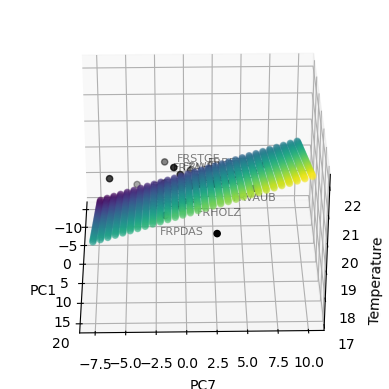

In [116]:
# linear regression of PC1 and PC4 and temp

# for visualisation
x_pred = np.linspace(-10, 20, 30)   # range of porosity values
y_pred = np.linspace(-7.5, 10, 30)  # range of brittleness values
xx_pred, yy_pred = np.meshgrid(x_pred, y_pred)
model_viz = np.array([xx_pred.flatten(), yy_pred.flatten()]).T

# Fit a linear regression model
model = LinearRegression()
model.fit(transformed_data[:, [0,6]], temp_result)
predicted = model.predict(model_viz)

# Get the coefficients
coefficients = model.coef_
intercept = model.intercept_

# Get the R^2 value
r_squared = model.score(transformed_data[:, [0,6]], temp_result)

print(f'R^2: {r_squared}')

# plot on 3d scatter plot

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(transformed_data[:, 0], transformed_data[:, 3], temp_result, c='black', cmap='viridis')
ax.scatter(xx_pred.flatten(), yy_pred.flatten(), predicted, c=predicted,alpha=0.5)
ax.set_xlabel('PC1')
ax.set_ylabel('PC7')
# Add text labels for station_id
for station_id in unique_station_ids:
    idx = station_ids == station_id
    for i in range(len(transformed_data[idx])):
        ax.text(transformed_data[idx][i, 0], transformed_data[idx][i, 6], temp_result[idx].iloc[i], 
                station_id, size=8, zorder=1, color='k')
ax.set_zlabel('Temperature')
for ii in np.arange(0, 360, 1):
    ax.view_init(elev=32, azim=ii)
    fig.savefig('gif_image%d.png' % ii)
plt.show()